This is for including dust attenuation effect in EAZY, by applying the Calzetti et al. (2000) attenuation curve to the template SEDs.

This code uses the dust attenuation process implemented in the EAZY package, but they don't add dust emmission that corresponds to the attenuation. This might be a issue when we incorporate the SPHEREx data since it spans the wavelength range where the dust emission might be significant.

In [11]:
import matplotlib_inline.backend_inline
from matplotlib import pyplot as plt
from astropy.table import Table
from pathlib import Path
import numpy as np
from eazy.templates import Redden

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

WD = Path.cwd()
TEMPDIR = WD.parent / 'BROWN_COSMOS'
temppaths_brown = list(TEMPDIR.glob('*.dat'))
temppaths_cosmos = list(TEMPDIR.glob('*.sed'))
temppaths = temppaths_brown + temppaths_cosmos
Avs = [0.25, 0.5, 1.0, 3.0, 5.0]

REDDENED_TEMPDIR = WD / 'BROWN_COSMOS_REDDENED'
REDDENED_TEMPDIR.mkdir(exist_ok=True)

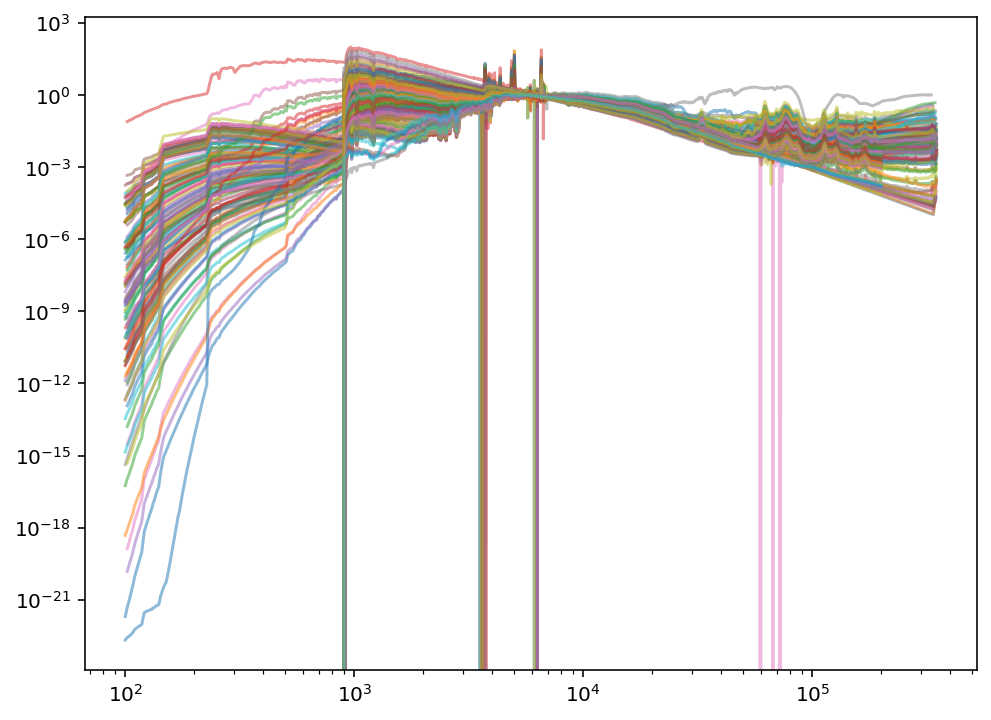

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for temppath in temppaths:
    temp = Table.read(temppath, format='ascii.basic', names=['wave', 'flux'], data_start=0)
    flux_at_6000 = np.interp(6000, temp['wave'], temp['flux'])
    normflux = temp['flux'] / flux_at_6000
    ax.plot(temp['wave'], normflux, label=temppath.stem, alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')

In [4]:
temppath = temppaths[0]
Av = Avs[0]

temptab = Table.read(temppath, format='ascii.basic', names=['wave', 'flux'], data_start=0)
redfunc = Redden(model="c00", Av=Av)
red = redfunc(temptab['wave'].value)
reddened_flux = temptab['flux'] * red

reddened_temptab = temptab.copy()
reddened_temptab['flux'] = reddened_flux
reddened_temptab.write(REDDENED_TEMPDIR/(temppath.stem + f'_Av{Av}.txt'), format='ascii.fixed_width_no_header', delimiter=' ', overwrite=True)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


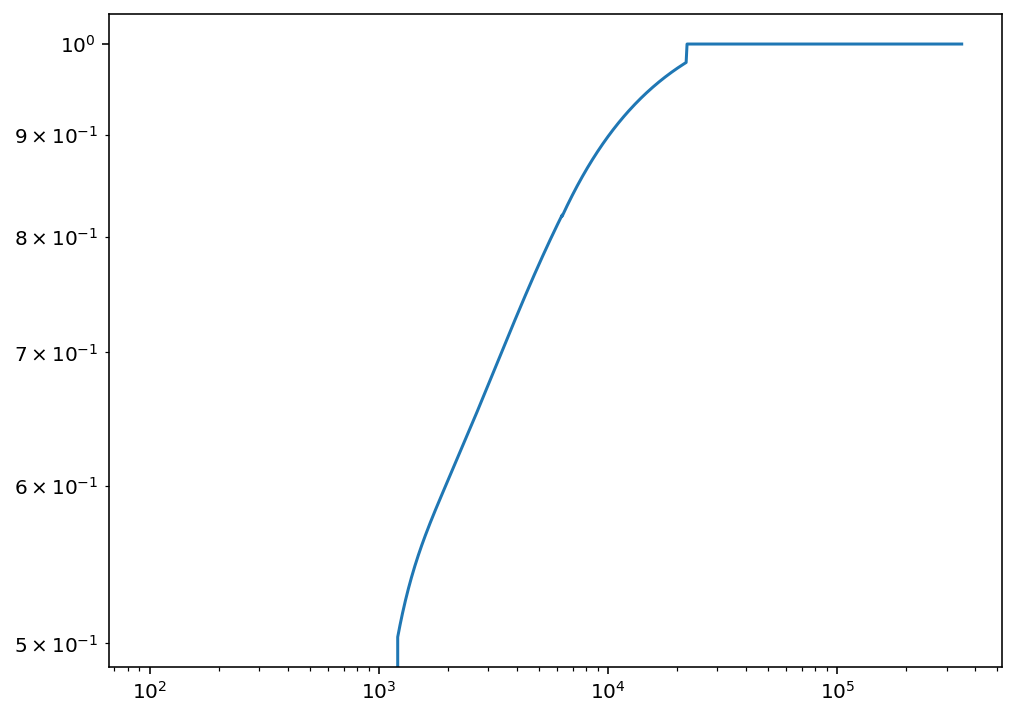

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(temptab['wave'], red)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(1200, 2e4)

In [23]:
def calzetti00_extpol(wave, redfunc):
    slope1 = (np.log10(redfunc(1201)) - np.log10(redfunc(1200)))
    logval600 = np.log10(redfunc(1200)) + slope1 * (600-1200)
    slope2 = (logval600 + 0.4*120/4.02) / (600-100)

    attenuation = np.ones_like(wave)
    ex0 = np.where(wave >= 1200)
    attenuation[ex0] = redfunc(wave[ex0])
    ex1 = np.where((wave >= 600) & (wave < 1200))
    # ex1 = np.where(wave < 1200)
    attenuation[ex1] = 10**((np.log10(redfunc(1200)) + slope1 * (wave[ex1]-1200)))
    ex2 = np.where(wave < 600)
    attenuation[ex2] = 10**((logval600 + slope2 * (wave[ex2]-600)))

    return attenuation

In [24]:
for temppath in temppaths:
    temptab = Table.read(temppath, format='ascii.basic', names=['wave', 'flux'], data_start=0)
    for Av in Avs:
        redfunc = Redden(model="c00", Av=Av)
        red = calzetti00_extpol(temptab['wave'].value, redfunc)
        reddened_flux = temptab['flux'] * red

        reddened_temptab = temptab.copy()
        reddened_temptab['flux'] = reddened_flux
        reddened_temptab.write(REDDENED_TEMPDIR/(temppath.stem + f'_Av{Av}.txt'), format='ascii.fixed_width_no_header', delimiter=' ', overwrite=True)

Text(0, 0.5, 'Flux')

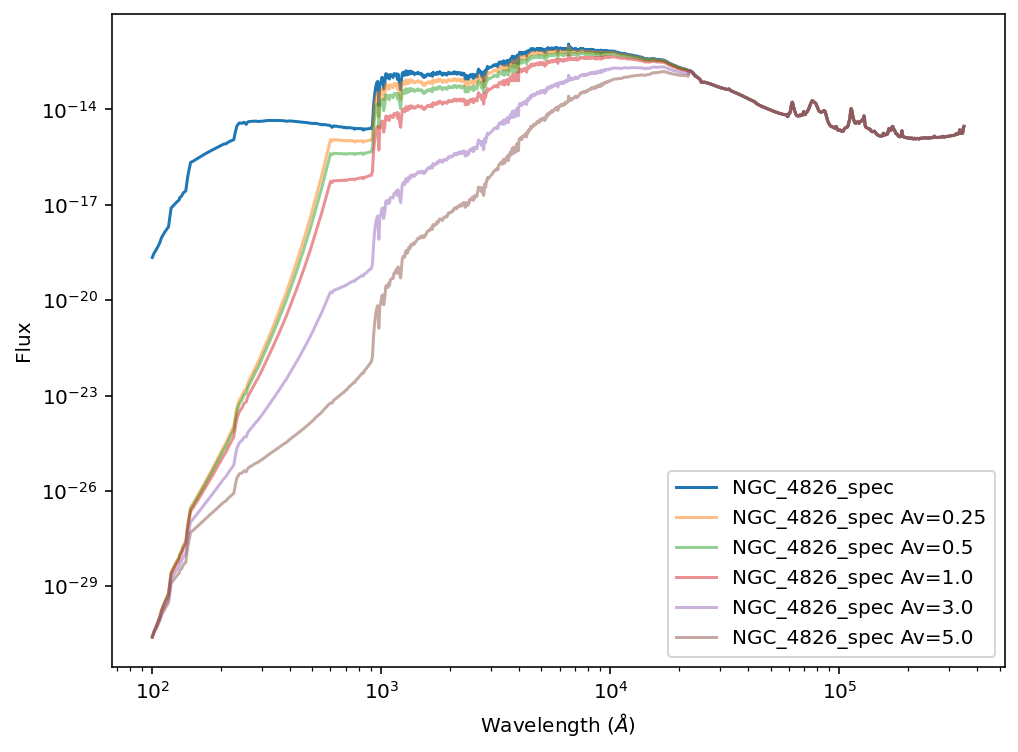

In [25]:
temppath = temppaths[0] # 141
temptab = Table.read(temppath, format='ascii.basic', names=['wave', 'flux'], data_start=0)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(temptab['wave'], temptab['flux'], label=temppath.stem)
for Av in Avs:
    reddened_temppath = REDDENED_TEMPDIR/(temppath.stem + f'_Av{Av}.txt')
    reddened_temptab = Table.read(reddened_temppath, format='ascii.basic', names=['wave', 'flux'], data_start=0)
    ax.plot(reddened_temptab['wave'], reddened_temptab['flux'], label=f'{temppath.stem} Av={Av}', alpha=0.5)
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Wavelength ($\AA$)')
ax.set_ylabel('Flux')


Text(0, 0.5, 'Flux')

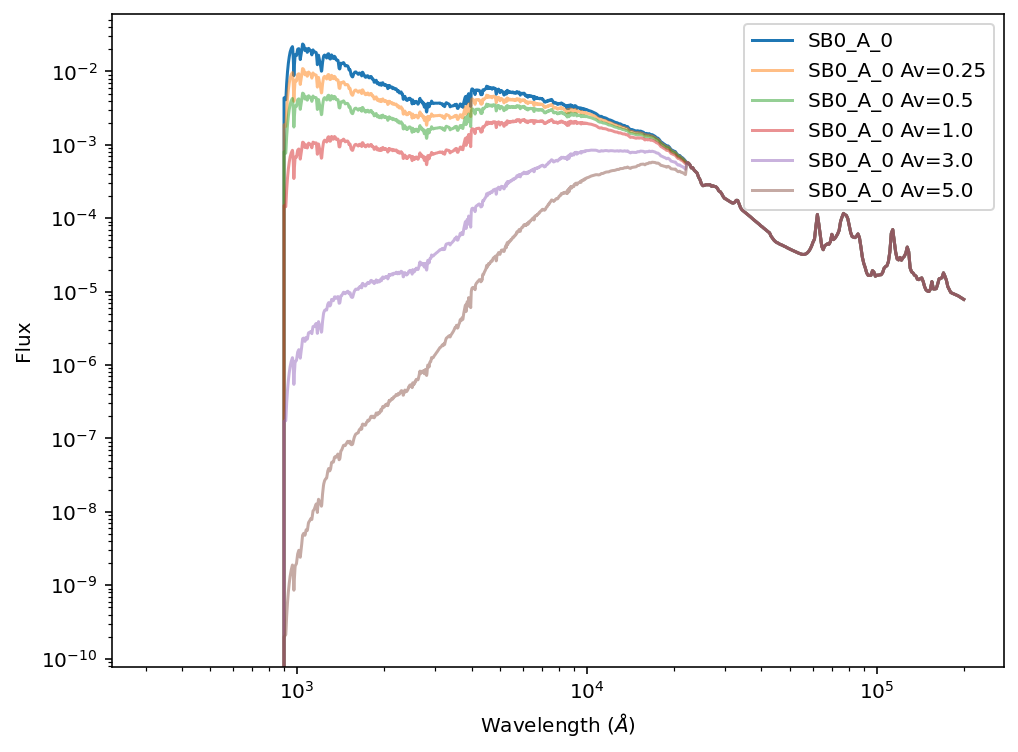

In [26]:
temppath = temppaths[141] # 141
temptab = Table.read(temppath, format='ascii.basic', names=['wave', 'flux'], data_start=0)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(temptab['wave'], temptab['flux'], label=temppath.stem)
for Av in Avs:
    reddened_temppath = REDDENED_TEMPDIR/(temppath.stem + f'_Av{Av}.txt')
    reddened_temptab = Table.read(reddened_temppath, format='ascii.basic', names=['wave', 'flux'], data_start=0)
    ax.plot(reddened_temptab['wave'], reddened_temptab['flux'], label=f'{temppath.stem} Av={Av}', alpha=0.5)
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Wavelength ($\AA$)')
ax.set_ylabel('Flux')

Text(0, 0.5, 'Flux')

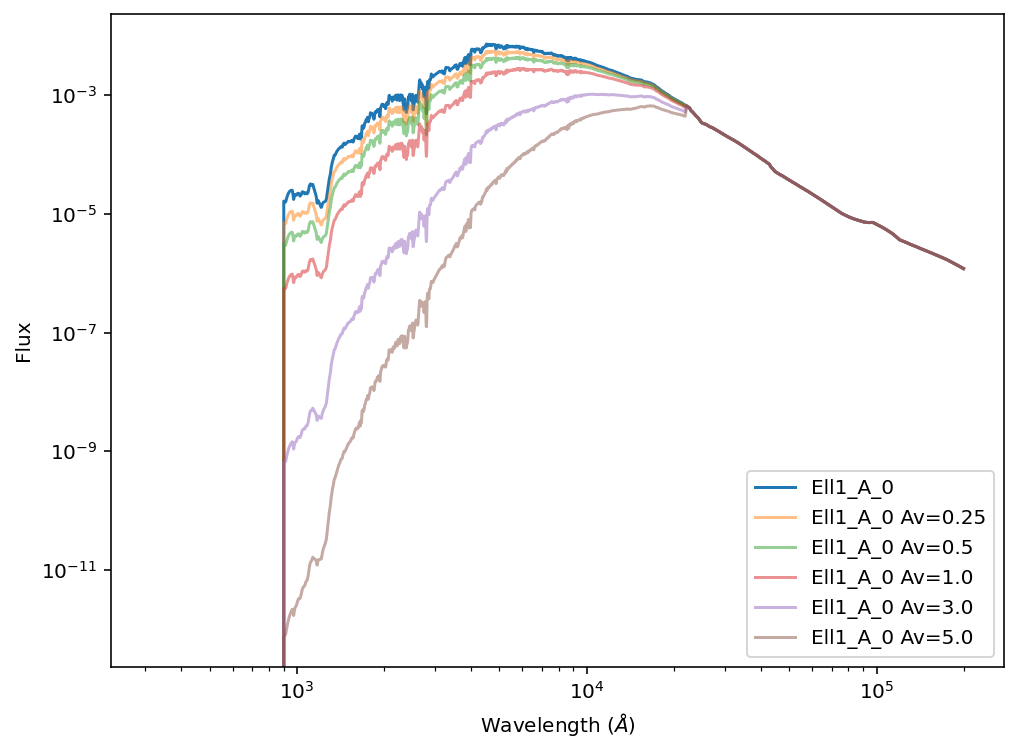

In [27]:
temppath = temppaths[159] # 141
temptab = Table.read(temppath, format='ascii.basic', names=['wave', 'flux'], data_start=0)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(temptab['wave'], temptab['flux'], label=temppath.stem)
for Av in Avs:
    reddened_temppath = REDDENED_TEMPDIR/(temppath.stem + f'_Av{Av}.txt')
    reddened_temptab = Table.read(reddened_temppath, format='ascii.basic', names=['wave', 'flux'], data_start=0)
    ax.plot(reddened_temptab['wave'], reddened_temptab['flux'], label=f'{temppath.stem} Av={Av}', alpha=0.5)
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Wavelength ($\AA$)')
ax.set_ylabel('Flux')